# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)


## Generate Cities List

In [11]:
# Create a 2 lists for holding lat_longs and cities
lat_long = []
cities = []


# Create a set of random latitude and longitude combinations. 
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(latitudes, longitudes)


# Identify nearest city for each latitude, longitude combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
lat_longs_list = list(lat_longs)
#len(cities)
print(len(cities))

618


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# # Base URL to work off    
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
latitude = []
longitude = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        latitude.append(response["coord"]["lat"])  
        longitude.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print(f"City not found...skipping {city}.")


Processing record 1|tuktoyaktuk
Processing record 2|veraval
Processing record 3|rikitea
Processing record 4|tuatapere
City not found...skipping stamsund.
Processing record 5|amberley
Processing record 6|bredasdorp
Processing record 7|aklavik
Processing record 8|ushuaia
Processing record 9|castro
Processing record 10|maceio
Processing record 11|sioux lookout
Processing record 12|tilichiki
Processing record 13|souillac
Processing record 14|maarianhamina
Processing record 15|avarua
Processing record 16|palmer
Processing record 17|thompson
Processing record 18|nador
Processing record 19|bethel
Processing record 20|cape town
Processing record 21|puerto ayora
Processing record 22|hermanus
Processing record 23|rawson
Processing record 24|balkhash
Processing record 25|los llanos de aridane
Processing record 26|narsaq
Processing record 27|kapaa
Processing record 28|heerenveen
Processing record 29|broome
Processing record 30|vaini
Processing record 31|grindavik
Processing record 32|norden
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
#Creating city dataframe.  Use the lists created in cell above to make columns in csv.
city_weather_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":latitude,
                        "Lng":longitude,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_weather_df = city_weather_df.rename_axis('City ID')

#Exporting city_weather_df to csv and save to the output_files folder
city_weather_df.to_csv("output_files/city_weather.csv")

#Displaying dataframe
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Tuktoyaktuk,40,CA,1610245021,84,69.4541,-133.0374,-4.00,13.80
1,Verāval,13,IN,1610245081,59,20.9000,70.3667,70.21,11.32
2,Rikitea,100,PF,1610245008,75,-23.1203,-134.9692,78.87,13.80
3,Tuatapere,89,NZ,1610244861,72,-46.1333,167.6833,64.00,21.99
4,Amberley,1,US,1610245081,86,39.2048,-84.4280,28.99,1.59


In [54]:
# Do a count to determine how many city datapoints are in each column
city_weather_df.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
# Manually opened the csv file and found no cities with humidity >100%. This step was skipped. 

In [56]:
#  Get the indices of cities that have humidity over 100%.


In [57]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

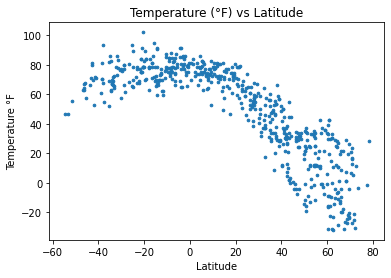

In [58]:
# Build a scatter plot for Latitude vs. Temperature
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", s=7)

# Label this scatter plot and save this plot to output_files folder
plt.title("Temperature (°F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature °F")
plt.savefig("output_files/Temperature (°F) vs Latitude")
plt.show()


The Temperature (°F) vs Latitude plot proves that as cities move away from the equator, the temperature drops. 
Inversely, cities that are closer to the equator have a warmer temperature. 

## Latitude vs. Humidity Plot

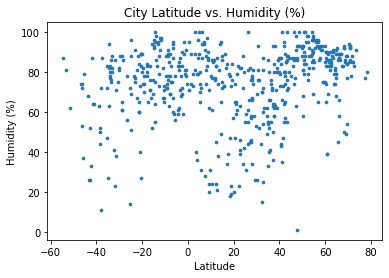

In [63]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", s=7)

# Label this scatter plot and save this plot to output_files folder
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_files/Latitude vs Humidity")
plt.show()

There does not seem to be a strong correlation to latitude in the City Latitude vs. Humidity plot.  
It does appear that there are more cities with humidity over 60% than can be found below 60%. 

## Latitude vs. Cloudiness Plot

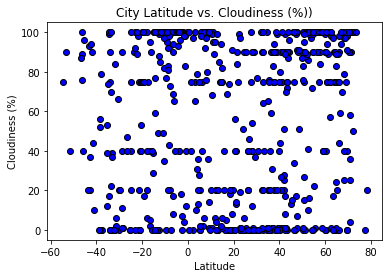

In [68]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", s=7)

# Label this scatter plot and save this plot to output_files folder
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%))")
plt.savefig("output_files/Latitude vs Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

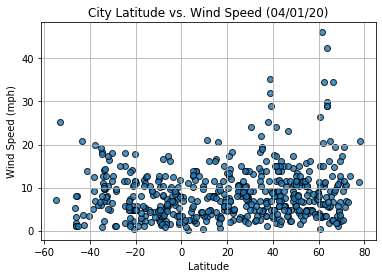

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


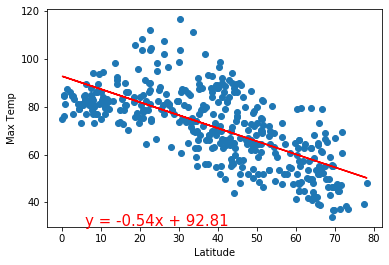

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


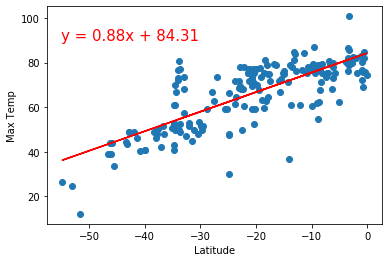

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


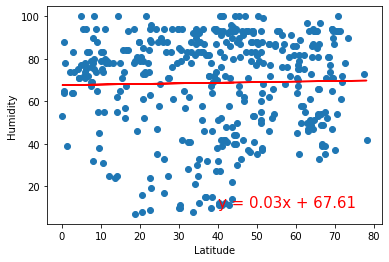

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


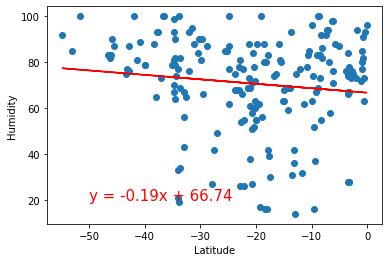

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


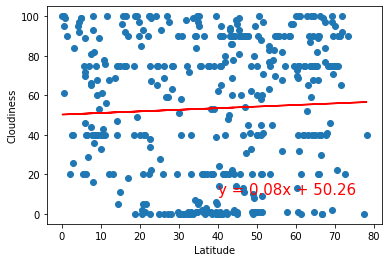

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


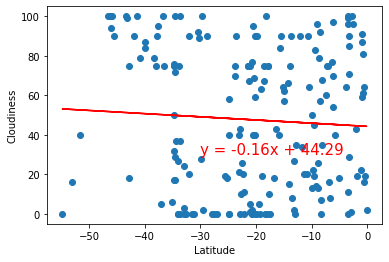

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


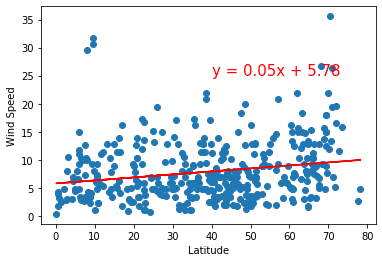

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


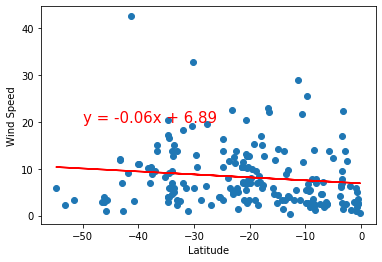